# 🌍🚀 Curso rápido: Introducción al Ecosistema de Copernicus


<img src="CDSE.png" alt="Descripción" width="400" height="300"/>



# 🛰️ Análisis de Incendios con la API de OpenEO en el Copernicus Data Space Ecosystem

En este notebook aprenderemos a utilizar funciones básicas de **JupyterLab** junto con la **API de OpenEO**, empleando máquinas virtuales gratuitas disponibles en el entorno del **Copernicus Data Space Ecosystem**.

A lo largo del documento se abordarán aspectos clave como:

- Acceso y filtrado de colecciones de datos de Copernicus  
- Generación de archivos en formato **NetCDF**
- Visualización de datos satelitales y composiciones **RGB**
- Cálculo de **índices espectrales** aplicados a eventos específicos

Este ejercicio se centra en una zona afectada por incendios ocurridos entre octubre y noviembre de 2024 en **Ecuador**.

---

**Desarrollado por:**  
Cristian Aguilar-Barboza  
📧 cristian.aguilar.rac@gmail.com

## Importar librerias necesarias

In [2]:
import openeo ## Libreria de interes
import xarray
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## 🛰️ ¿Qué es openEO?

La API estandarizada de **openEO** permite acceder y procesar conjuntos de datos de **observación de la Tierra** dentro del ecosistema de Copernicus utilizando bibliotecas de programación intuitivas.

El procesamiento se ejecuta de forma escalable en una infraestructura en la nube que aloja los datos, lo que habilita una amplia gama de casos de uso, desde la **investigación exploratoria** hasta la **producción a gran escala** de mapas e información derivados de datos EO.

---

⚙️ Funcionalidades destacadas

- 📊 **Cálculo de estadísticas** sobre grandes cantidades de polígonos
- 📤 **Exportación de resultados** a formatos populares: `GeoTIFF`, `NetCDF`, `CSV`, `JSON`
- 🐍 **Integración directa con código Python** existente
- 🌍 **Procesamiento masivo** para crear mapas a escala continental

---




🔑 **Credenciales**

In [3]:
connection = openeo.connect(url="openeo.dataspace.copernicus.eu")
connection

<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with NullAuth>

In [4]:
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

## 📍🛰️ **Filtrar colecciones de datos**

In [5]:
# Importar coordenadas del ROI
polygon_coordinates = [
    [-79.296227, -3.056011],
    [-79.296227, -3.003042],
    [-79.229107, -3.003042],
    [-79.229107, -3.056011],
    [-79.296227, -3.056011]  # No olvidar cerrar el polígono
]

# Cargar imagen PRE-incendio
pre_fire = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=("2024-01-25", "2024-01-28"),  # Ajuste fecha  según su caso de estudio
    spatial_extent={"type": "Polygon", "coordinates": [polygon_coordinates], "crs": "EPSG:4326"},
    bands=["B02", "B03", "B04", "B08","B11","B12", "SCL"],
    max_cloud_cover=100  # Ajuste según necesidad 
).rename_labels(dimension="bands", target=["B02_pre", "B03_pre", "B04_pre", "B08_pre","B11_pre","B12_pre", "SCL_pre"])

#Cargar imagen POST-incendio (renombrando bandas)
post_fire = connection.load_collection(
    "SENTINEL2_L2A",
    temporal_extent=("2024-10-15", "2024-10-18"),  # Ajusta fecha según disponibilidad
    spatial_extent={"type": "Polygon", "coordinates": [polygon_coordinates], "crs": "EPSG:4326"},
    bands=["B02", "B03", "B04", "B08", "B11","B12","SCL"],
    max_cloud_cover=100
).rename_labels(dimension="bands", target=["B02_post", "B03_post", "B04_post", "B08_post","B11_post","B12_post","SCL_post"])

# Combinar  conjuntos de datos
combined_cube = pre_fire.merge_cubes(post_fire)

## ⬇️ Descargue los datos en su maquina virtual

📦 ¿Qué es un archivo NetCDF?

Los archivos **NetCDF** (Network Common Data Form) son un formato estándar abierto diseñado para almacenar, compartir y distribuir datos científicos, especialmente aquellos que varían en múltiples dimensiones como el tiempo, la latitud, la longitud o la altitud.

---

✅ Características  de NetCDF

- 🖥️ **Independiente de plataforma y sistema operativo:** puede utilizarse en distintos entornos sin necesidad de conversión.
- 🧮 **Soporte para matrices multidimensionales:** ideal para variables como **temperatura**, **presión**, **precipitación**, etc.
- 🧾 **Almacenamiento estructurado:** incluye **dimensiones**, **variables** y **atributos** para describir detalladamente los datos.
- 📊 **Manejo eficiente de grandes volúmenes de datos.**
- 🌐 **Estándar abierto** ampliamente adoptado en comunidades científicas y de teledetección.
- 🧰 **Compatible con múltiples lenguajes** como **Python**, **C/C++**, **MATLAB**, entre otros, gracias a librerías específicas como `netCDF4`, `xarray` o `h5netcdf`.

---

🔗 Más información

📚 Puede encontrar más detalles en la [página oficial de Unidata](https://www.unidata.ucar.edu/software/netcdf/)

---

🖼️ Ejemplo visual

![netCDF](https://desktop.arcgis.com/es/arcmap/latest/manage-data/netcdf/GUID-1D7240CD-54D4-45FF-A150-43B1AFFBF7D6-web.gif)


In [6]:
# Descarga de datos
%time combined_cube.download("S2_pre_post_fire.nc")
print("Descarga completa del archivo .netCDF")

CPU times: user 103 ms, sys: 110 ms, total: 213 ms
Wall time: 39.3 s
Descarga completa del archivo .netCDF


## Analizar el archivo NetCDF

In [7]:
# Abre el archivo NetCDF
dataset = xr.open_dataset('S2_pre_post_fire.nc') ## Nombre del archivo
# Muestra la información del archivo
dataset

<xarray.Dataset> Size: 49MB
Dimensions:   (t: 2, x: 748, y: 588)
Coordinates:
  * t         (t) datetime64[ns] 16B 2024-01-26 2024-10-17
  * x         (x) float64 6kB 6.893e+05 6.894e+05 ... 6.968e+05 6.968e+05
  * y         (y) float64 5kB 9.668e+06 9.668e+06 ... 9.662e+06 9.662e+06
Data variables: (12/15)
    crs       |S1 1B ...
    B02_pre   (t, y, x) float32 4MB ...
    B03_pre   (t, y, x) float32 4MB ...
    B04_pre   (t, y, x) float32 4MB ...
    B08_pre   (t, y, x) float32 4MB ...
    B11_pre   (t, y, x) float32 4MB ...
    ...        ...
    B03_post  (t, y, x) float32 4MB ...
    B04_post  (t, y, x) float32 4MB ...
    B08_post  (t, y, x) float32 4MB ...
    B11_post  (t, y, x) float32 4MB ...
    B12_post  (t, y, x) float32 4MB ...
    SCL_post  (t, y, x) float32 4MB ...
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

## 🎨 Combinaciones de bandas en imágenes satelitales

Las combinaciones de bandas en imágenes satelitales consisten en asignar diferentes bandas espectrales a los canales de color rojo, verde y azul (RGB) para visualizar la información captada por los sensores remotos. Cada banda representa una porción específica del espectro electromagnético (como el visible, infrarrojo cercano o infrarrojo de onda corta), y su combinación permite resaltar distintas características del terreno, cuerpos de agua, vegetación o zonas urbanas.

Estas combinaciones pueden ser **naturales** (imitando lo que vería el ojo humano) o **falsas**, diseñadas para enfatizar fenómenos específicos, como el vigor de la vegetación, áreas quemadas o la presencia de humedad. En resumen, las combinaciones de bandas son fundamentales para interpretar correctamente los datos satelitales y extraer información útil para aplicaciones ambientales, agrícolas, urbanas o de gestión de desastres.


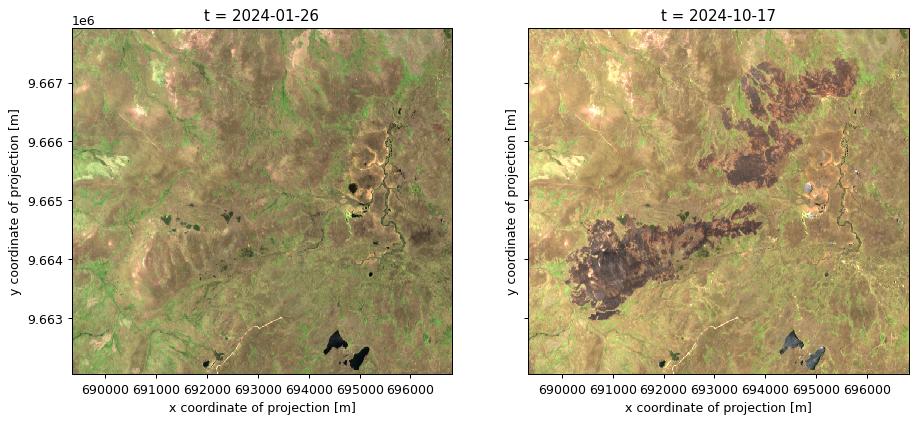

In [8]:
#Cargamos el NetCDF
ds = xarray.load_dataset('S2_pre_post_fire.nc')

# Configuramos la visualización de RGB
data = ds[["B04_pre", "B03_pre", "B02_pre"]].to_array(dim="bands")
data2 = ds[["B04_post", "B03_post", "B02_post"]].to_array(dim="bands")

#Configuración de visualización
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), dpi=90, sharey=True)
data[{"t": 0}].plot.imshow(vmin=0, vmax=1000, ax=axes[0])
data2[{"t": 1}].plot.imshow(vmin=0, vmax=1000, ax=axes[1]);


 <details>
  <summary><font size="3" color="darkgreen"><b>Detalles de la combinación RGB color verdadero</b></font></summary>
    
    
* La combinación de color verdadero (o color natural) con imágenes Sentinel-2 utiliza las bandas B04 (rojo), BO3 (verde) y BO2 (azul) asignadas respectivamente a los canales RGB. Esta combinación reproduce una imagen similar a lo que el ojo humano vería desde el espacio, permitiendo una interpretación visual intuitiva del paisaje. Es útil para identificar cuerpos de agua, áreas urbanas, vegetación y suelos expuestos, aunque puede verse afectada por nubes, sombras y la atmósfera. Las bandas 4, 3 y 2 tienen una resolución espacial de 10 metros, lo que permite un análisis detallado de la superficie terrestre.

    

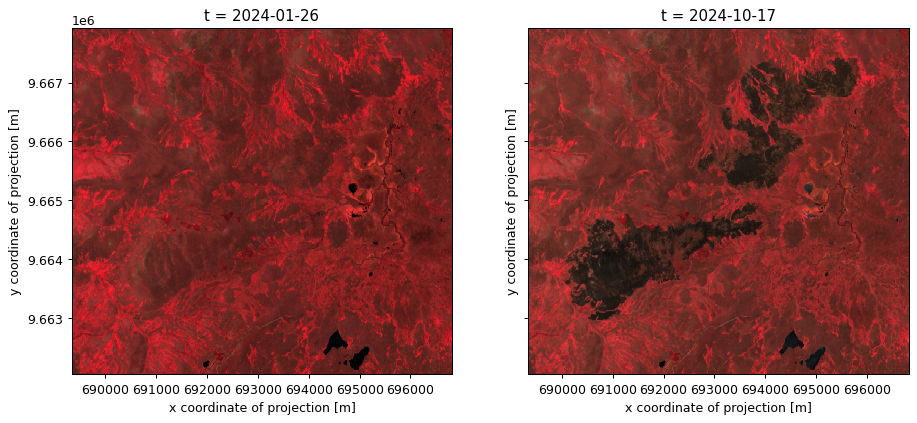

In [9]:
# Configuramos la visualización RGB
data = ds[["B08_pre", "B04_pre", "B03_pre"]].to_array(dim="bands")
data2 = ds[["B08_post", "B04_post", "B03_post"]].to_array(dim="bands")

#Configuración de visualización
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), dpi=90, sharey=True)
data[{"t": 0}].plot.imshow(vmin=0, vmax=4000, ax=axes[0])
data2[{"t": 1}].plot.imshow(vmin=0, vmax=4000, ax=axes[1]);

 <details>
  <summary><font size="3" color="darkgreen"><b>Detalles de la combinación RGB infrarojo</b></font></summary>
    
    
* Esta combinación, también conocida como color infrarrojo, asigna las bandas B08 (infrarrojo cercano), B04 (rojo) y B03 (verde) a los canales RGB respectivamente. Es muy utilizada para analizar la vegetación, ya que las plantas sanas reflejan fuertemente en el infrarrojo cercano (NIR), apareciendo en tonos rojos intensos en la imagen. Las áreas urbanas suelen verse en tonos azulados y los cuerpos de agua en tonos oscuros. Esta combinación facilita la detección de zonas agrícolas, salud del follaje y coberturas naturales. Las tres bandas tienen una resolución espacial de 10 metros, permitiendo análisis detallados en estudios ambientales y de uso del suelo.


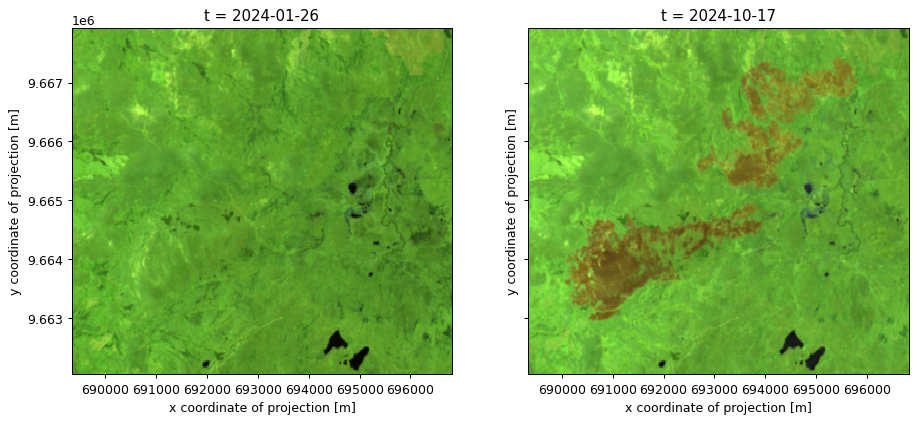

In [10]:
# Configuramos la visualización RGB
data = ds[["B12_pre", "B11_pre", "B04_pre"]].to_array(dim="bands")
data2 = ds[["B12_post", "B11_post", "B04_post"]].to_array(dim="bands")

#Configuración de visualización
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), dpi=90, sharey=True)
data[{"t": 0}].plot.imshow(vmin=00, vmax=3500, ax=axes[0])
data2[{"t": 1}].plot.imshow(vmin=00, vmax=3500, ax=axes[1]);

 <details>
  <summary><font size="3" color="darkgreen"><b>Detalles de la combinación RGB con SWIR</b></font></summary>
    
    
* Esta combinación utiliza las bandas B12 (infrarrojo de onda corta 2 - SWIR 2), B11 (SWIR 1) y B04 (rojo) asignadas a los canales RGB respectivamente. Es útil para detectar humedad del suelo, vegetación seca, suelos desnudos e incendios. Las áreas con alta humedad o vegetación viva suelen aparecer en tonos verdes oscuros, mientras que los suelos secos o zonas quemadas se ven en tonos claros o anaranjados. Esta combinación es muy utilizada en aplicaciones de gestión de incendios forestales, evaluación de sequías y estudios geológicos. Las bandas B12 y B11 tienen una resolución de 20 metros, mientras que B04 tiene 10 metros, por lo que se suele hacer una reproyección para igualar resoluciones.

Con la estructura anterior puede crear mútiples combinaciones RGB

## 📈 ¿Qué son los índices espectrales?

Los **índices espectrales** son combinaciones matemáticas de bandas espectrales extraídas de imágenes satelitales, diseñadas para resaltar características específicas de la superficie terrestre. Estos índices se calculan aplicando fórmulas simples entre dos o más bandas (como restas, sumas o razones), lo que permite amplificar señales útiles y reducir el efecto de elementos no deseados como las sombras o las nubes.

Su principal función es facilitar la interpretación y el análisis de fenómenos ambientales y territoriales, como la detección de vegetación, cuerpos de agua, suelos descubiertos, incendios o cambios en la cobertura del suelo. Por ejemplo, el **NDVI** (Índice de Vegetación de Diferencia Normalizada) es uno de los más utilizados para monitorear el estado de la vegetación, mientras que el **NBR** se emplea comúnmente para evaluar áreas afectadas por incendios.

En resumen, los índices espectrales son herramientas esenciales para transformar los datos multiespectrales en información comprensible y aplicable en estudios ambientales, agrícolas, urbanos y de gestión del territorio.


### 🌳🌽 Crear NDVI

In [11]:
# Calcular NDVI PRE-incendio
ndvi_pre = (dataset['B08_pre'] - dataset['B04_pre']) / (dataset['B08_pre'] + dataset['B04_pre'])
ndvi_pre.name = 'NDVI_pre'
ndvi_pre.attrs['long_name'] = 'Normalized Difference Vegetation Index'
ndvi_pre.attrs['units'] = '1'
# Agregar NDVI al dataset original
dataset['NDVI_pre'] = ndvi_pre

# Calcular NDVI POST-incendio
ndvi_post= (dataset['B08_post'] - dataset['B04_post']) / (dataset['B08_post'] + dataset['B04_post'])
# Asegurarse de que el NDVI tenga el mismo nombre de coordenadas y atributos
ndvi_post.name = 'NDVI_post'
ndvi_post.attrs['long_name'] = 'Normalized Difference Vegetation Index'
ndvi_post.attrs['units'] = '1'
# Agregar NDVI al dataset original
dataset['NDVI_post'] = ndvi_post


In [12]:
# Guardar el dataset actualizado en un nuevo archivo NetCDF
dataset.to_netcdf('S2__pre_post_fire_ndvi.nc')

print("NDVI calculado y agregado al archivo NetCDF.")

dataset

NDVI calculado y agregado al archivo NetCDF.


<xarray.Dataset> Size: 56MB
Dimensions:    (t: 2, x: 748, y: 588)
Coordinates:
  * t          (t) datetime64[ns] 16B 2024-01-26 2024-10-17
  * x          (x) float64 6kB 6.893e+05 6.894e+05 ... 6.968e+05 6.968e+05
  * y          (y) float64 5kB 9.668e+06 9.668e+06 ... 9.662e+06 9.662e+06
Data variables: (12/17)
    crs        |S1 1B ...
    B02_pre    (t, y, x) float32 4MB ...
    B03_pre    (t, y, x) float32 4MB ...
    B04_pre    (t, y, x) float32 4MB ...
    B08_pre    (t, y, x) float32 4MB ...
    B11_pre    (t, y, x) float32 4MB ...
    ...         ...
    B08_post   (t, y, x) float32 4MB ...
    B11_post   (t, y, x) float32 4MB ...
    B12_post   (t, y, x) float32 4MB ...
    SCL_post   (t, y, x) float32 4MB ...
    NDVI_pre   (t, y, x) float32 4MB 0.4432 0.4418 0.4516 0.4565 ... nan nan nan
    NDVI_post  (t, y, x) float32 4MB nan nan nan nan ... 0.4829 0.4374 0.3515
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

### 🌳🌽 Visualizar NDVI

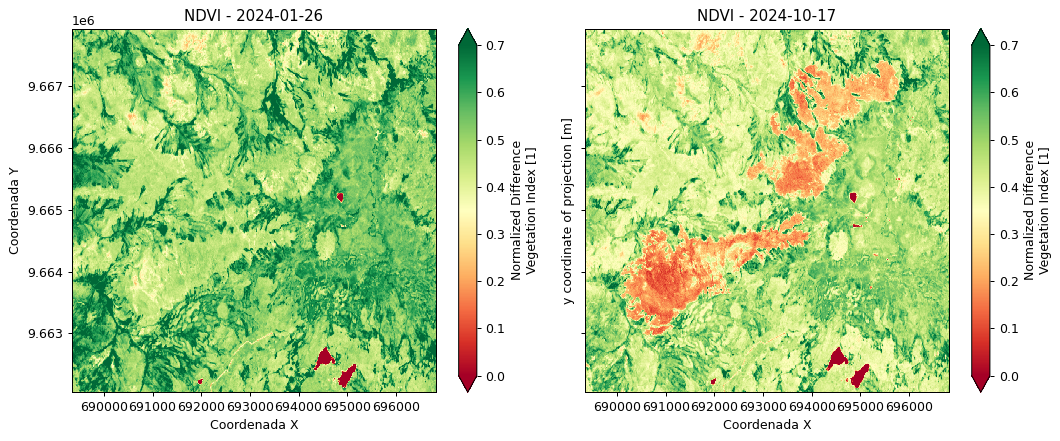

In [13]:
# Cargamos el nuevo .nc 
ds = xr.open_dataset('S2__pre_post_fire_ndvi.nc')

#  Figura con dos subplots para visualizar el pre y post incendio
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), dpi=90, sharey=True)

# Cambia los índices en "isel" para seleccionar diferentes fechas en este caso solo tenemos dos fechas: 0 y 1
ndvi_date1 = ds["NDVI_pre"].isel(t=0)  # Primera fecha
ndvi_date2 = ds["NDVI_post"].isel(t=1)  

# Extraer las fechas de la dimensión 't'
date1 = str(ndvi_date1['t'].values)[:10]  # Obtener la fecha en formato 'YYYY-MM-DD'
date2 = str(ndvi_date2['t'].values)[:10] 

# Visualizar la primera imagen de NDVI
ndvi_date1.plot.imshow(ax=axes[0], cmap='RdYlGn', vmin=0, vmax=0.7) ## Ajuste estos valores a su criterio
axes[0].set_title(f'NDVI - {date1}')  # Título con la fecha extraída

# Visualizar la segunda imagen de NDVI
ndvi_date2.plot.imshow(ax=axes[1], cmap='RdYlGn', vmin=0, vmax=0.7) ## Ajuste estos valores a su criterio
axes[1].set_title(f'NDVI - {date2}')  

# Añadir etiquetas a los ejes
for ax in axes:
    ax.set_xlabel('Coordenada X')
axes[0].set_ylabel('Coordenada Y')

# Ajustar y mostrar las imágenes
plt.tight_layout()
plt.show()

### 📊🌾 Estadísticas básicas NDVI

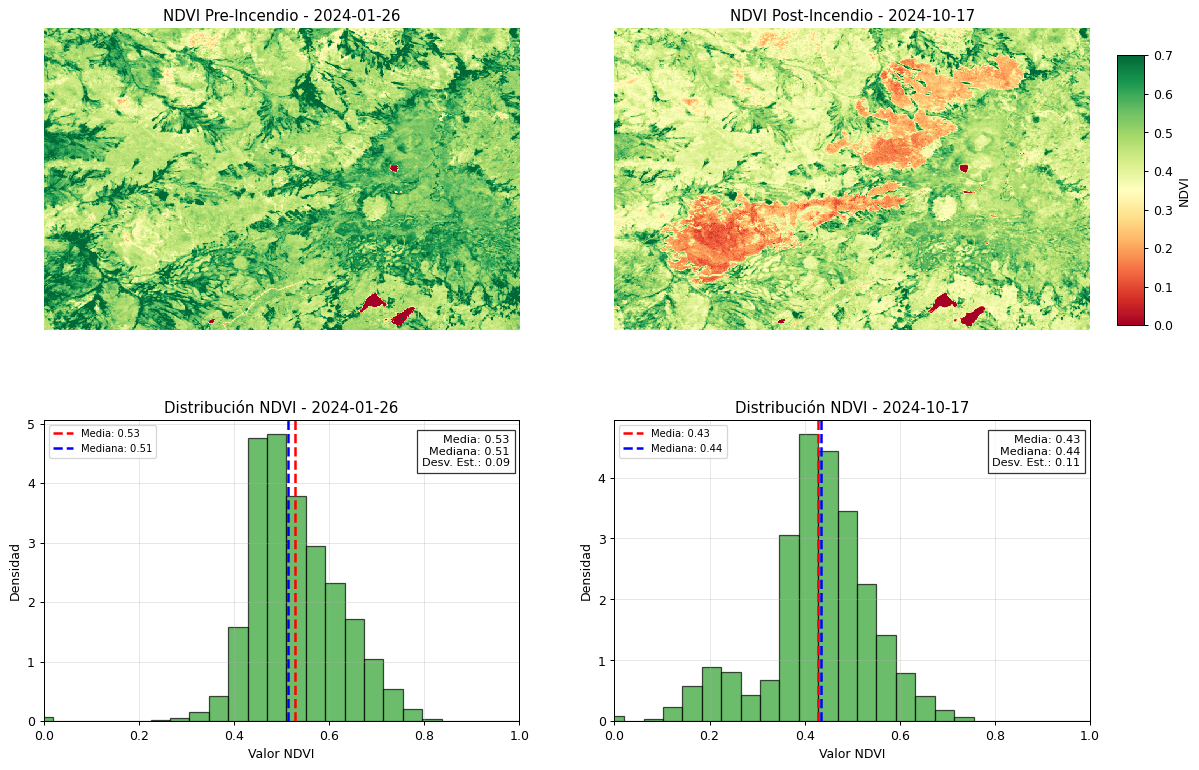

In [15]:
# Seleccionamos las fechas 
ndvi_date1 = ds.isel(t=0)  # Primera fecha
ndvi_date2 = ds.isel(t=1)  # Segunda fecha

# Extraer fechas
date1 = str(ndvi_date1['t'].values)[:10]
date2 = str(ndvi_date2['t'].values)[:10]

# Crear figura
fig, axes = plt.subplots(2, 2, figsize=(15, 10), dpi=90)
plt.subplots_adjust(hspace=0.3, wspace=0.2)

#  Función para crear histogramas
def plot_histogram(ax, data, date):
    # Limpieza de datos
    ndvi_values = data.values.flatten()
    ndvi_values = ndvi_values[~np.isnan(ndvi_values)]  # Eliminar NaNs
    ndvi_values = ndvi_values[np.isfinite(ndvi_values)]  # Eliminar infinitos
    ndvi_values = np.clip(ndvi_values, 0, 1)  # Forzar rango físico
    
    # Configurar histograma
    ax.hist(ndvi_values, 
            bins=np.linspace(-1, 1, 50),  # Bins fijos para NDVI
            color='#2ca02c', 
            alpha=0.7, 
            edgecolor='black', 
            density=True)
    
    # Estadísticas
    mean = np.mean(ndvi_values)
    median = np.median(ndvi_values)
    std = np.std(ndvi_values)
    
    # Líneas de referencia
    ax.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Media: {mean:.2f}')
    ax.axvline(median, color='blue', linestyle='dashed', linewidth=2, label=f'Mediana: {median:.2f}')
    
    # Texto informativo
    text = f'''Media: {mean:.2f}
Mediana: {median:.2f}
Desv. Est.: {std:.2f}'''
    ax.text(0.98, 0.95, text, transform=ax.transAxes,
            ha='right', va='top', fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8))
    
    # Configuraciones del gráfico
    ax.set_title(f'Distribución NDVI - {date}', fontsize=12)
    ax.set_xlabel('Valor NDVI', fontsize=10)
    ax.set_ylabel('Densidad', fontsize=10)
    ax.grid(alpha=0.3)
    ax.legend(fontsize=8, loc='upper left')
    ax.set_xlim(0, 1)  # Forzar eje X

# Visualización de mapas NDVI
# Primer fecha
ndvi_date1['NDVI_pre'].plot.imshow(
    ax=axes[0, 0], 
    cmap='RdYlGn', 
    vmin=0,  
    vmax=0.7, ## puede ajustar valores min y max
    add_colorbar=False
)
axes[0, 0].set_title(f'NDVI Pre-Incendio - {date1}', fontsize=12)
axes[0, 0].axis('off')

# Segunda fecha
ndvi_date2['NDVI_post'].plot.imshow(
    ax=axes[0, 1], 
    cmap='RdYlGn', 
    vmin=0,
    vmax=0.7, ## puede ajustar valores min y max
    add_colorbar=False
)
axes[0, 1].set_title(f'NDVI Post-Incendio - {date2}', fontsize=12)
axes[0, 1].axis('off')

# Visualización de histogramas
plot_histogram(axes[1, 0], ndvi_date1['NDVI_pre'], date1)
plot_histogram(axes[1, 1], ndvi_date2['NDVI_post'], date2)

# Añadir barra de color común
cax = fig.add_axes([0.92, 0.55, 0.02, 0.3])  # Posición [left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=plt.Normalize(vmin=0, vmax=0.7))
plt.colorbar(sm, cax=cax).set_label('NDVI', fontsize=10)

plt.show()

## 🔥🌳 Crear NBR



El **NBR** (*Normalized Burn Ratio*) es un índice espectral diseñado para detectar áreas afectadas por incendios forestales. Se calcula utilizando las bandas de **infrarrojo cercano (NIR)** y **infrarrojo de onda corta (SWIR)**, ya que estas bandas responden de manera distinta a la vegetación sana y a superficies quemadas. Su fórmula es:

**NBR = (NIR - SWIR) / (NIR + SWIR)**



In [16]:
# Calcular NBR pre-incendio
#Expresión Algrebraica
nbr_pre = (dataset['B08_pre'] - dataset['B12_pre']) / (dataset['B08_pre'] + dataset['B12_pre'])
nbr_pre.name = 'NBR_pre'
nbr_pre.attrs['long_name'] = 'Normalized Burn Ratio (Pre-Fire)'
nbr_pre.attrs['units'] = '1'
dataset['NBR_pre'] = nbr_pre

# Calcular NBR post-incendio
nbr_post = (dataset['B08_post'] - dataset['B12_post']) / (dataset['B08_post'] + dataset['B12_post'])
nbr_post.name = 'NBR_post'
nbr_post.attrs['long_name'] = 'Normalized Burn Ratio (Post-Fire)'
nbr_post.attrs['units'] = '1'
dataset['NBR_post'] = nbr_post

In [18]:
#Verificar si se crearon correctamente
dataset

<xarray.Dataset> Size: 63MB
Dimensions:    (t: 2, x: 748, y: 588)
Coordinates:
  * t          (t) datetime64[ns] 16B 2024-01-26 2024-10-17
  * x          (x) float64 6kB 6.893e+05 6.894e+05 ... 6.968e+05 6.968e+05
  * y          (y) float64 5kB 9.668e+06 9.668e+06 ... 9.662e+06 9.662e+06
Data variables: (12/19)
    crs        |S1 1B ...
    B02_pre    (t, y, x) float32 4MB ...
    B03_pre    (t, y, x) float32 4MB ...
    B04_pre    (t, y, x) float32 4MB ...
    B08_pre    (t, y, x) float32 4MB ...
    B11_pre    (t, y, x) float32 4MB ...
    ...         ...
    B12_post   (t, y, x) float32 4MB ...
    SCL_post   (t, y, x) float32 4MB ...
    NDVI_pre   (t, y, x) float32 4MB 0.4432 0.4418 0.4516 0.4565 ... nan nan nan
    NDVI_post  (t, y, x) float32 4MB nan nan nan nan ... 0.4829 0.4374 0.3515
    NBR_pre    (t, y, x) float32 4MB 0.07373 0.07989 0.0753 ... nan nan nan
    NBR_post   (t, y, x) float32 4MB nan nan nan nan ... 0.09302 0.02334 0.0575
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

### 🔥 ¿Qué es el dNBR?

El **dNBR** (*Delta Normalized Burn Ratio*) es un índice que mide el **cambio en la cobertura terrestre causado por incendios**, comparando imágenes satelitales tomadas **antes y después del evento**. Se basa en la diferencia entre dos valores del índice **NBR** (Normalized Burn Ratio), el cual utiliza bandas del infrarrojo cercano (NIR) e infrarrojo de onda corta (SWIR), sensibles a los cambios en la vegetación y la presencia de quemas.

La fórmula del dNBR es:

**NBR = NBR_pre - NBR_post**

In [19]:
# Calcular DNBR (Diferencia NBR)
dnbr = nbr_pre - nbr_post     #Expresión algebraica
dnbr.name = 'DNBR'
dnbr.attrs['long_name'] = 'Difference Normalized Burn Ratio'
dnbr.attrs['units'] = '1'
dataset['DNBR'] = dnbr

# Clasificación de severidad del incendio  USGS (U.S. Geological Survey) 
severity = xr.full_like(dnbr, np.nan)
severity = xr.where((dnbr >= -1.0) & (dnbr < -0.25), 0, severity)  # Aumento de vegetación
severity = xr.where((dnbr >= -0.25) & (dnbr < 0.1), 1, severity)   # Sin cambio
severity = xr.where((dnbr >= 0.1) & (dnbr < 0.27), 2, severity)    # Severidad baja
severity = xr.where((dnbr >= 0.27) & (dnbr < 0.44), 3, severity)   # Severidad moderada
severity = xr.where((dnbr >= 0.44) & (dnbr < 0.66), 4, severity)   # Severidad alta
severity = xr.where(dnbr >= 0.66, 5, severity)                     # Severidad muy alta

severity.name = 'Burn_Severity'
severity.attrs['long_name'] = 'Burn Severity Classification'
severity.attrs['units'] = 'Categorical'
severity.attrs['classes'] = '0: Vegetation increase; 1: Unburned; 2: Low severity; 3: Moderate; 4: High; 5: Very high'
dataset['Burn_Severity'] = severity

In [20]:
#Verificar si se crearon correctamente
dataset

<xarray.Dataset> Size: 70MB
Dimensions:        (t: 2, x: 748, y: 588)
Coordinates:
  * t              (t) datetime64[ns] 16B 2024-01-26 2024-10-17
  * x              (x) float64 6kB 6.893e+05 6.894e+05 ... 6.968e+05 6.968e+05
  * y              (y) float64 5kB 9.668e+06 9.668e+06 ... 9.662e+06 9.662e+06
Data variables: (12/21)
    crs            |S1 1B ...
    B02_pre        (t, y, x) float32 4MB ...
    B03_pre        (t, y, x) float32 4MB ...
    B04_pre        (t, y, x) float32 4MB ...
    B08_pre        (t, y, x) float32 4MB ...
    B11_pre        (t, y, x) float32 4MB ...
    ...             ...
    NDVI_pre       (t, y, x) float32 4MB 0.4432 0.4418 0.4516 ... nan nan nan
    NDVI_post      (t, y, x) float32 4MB nan nan nan ... 0.4829 0.4374 0.3515
    NBR_pre        (t, y, x) float32 4MB 0.07373 0.07989 0.0753 ... nan nan nan
    NBR_post       (t, y, x) float32 4MB nan nan nan ... 0.09302 0.02334 0.0575
    DNBR           (t, y, x) float32 4MB nan nan nan nan nan ... nan nan nan nan
    Burn_Severity  (t, y, x) float32 4MB nan nan nan nan nan ... nan nan nan nan
Attributes:
    Conventions:  CF-1.9
    institution:  openEO platform

### 🗾🔥📊 Visualizar todos lo datos creados

Tiempos disponibles: ['2024-01-26T00:00:00.000000000' '2024-10-17T00:00:00.000000000']


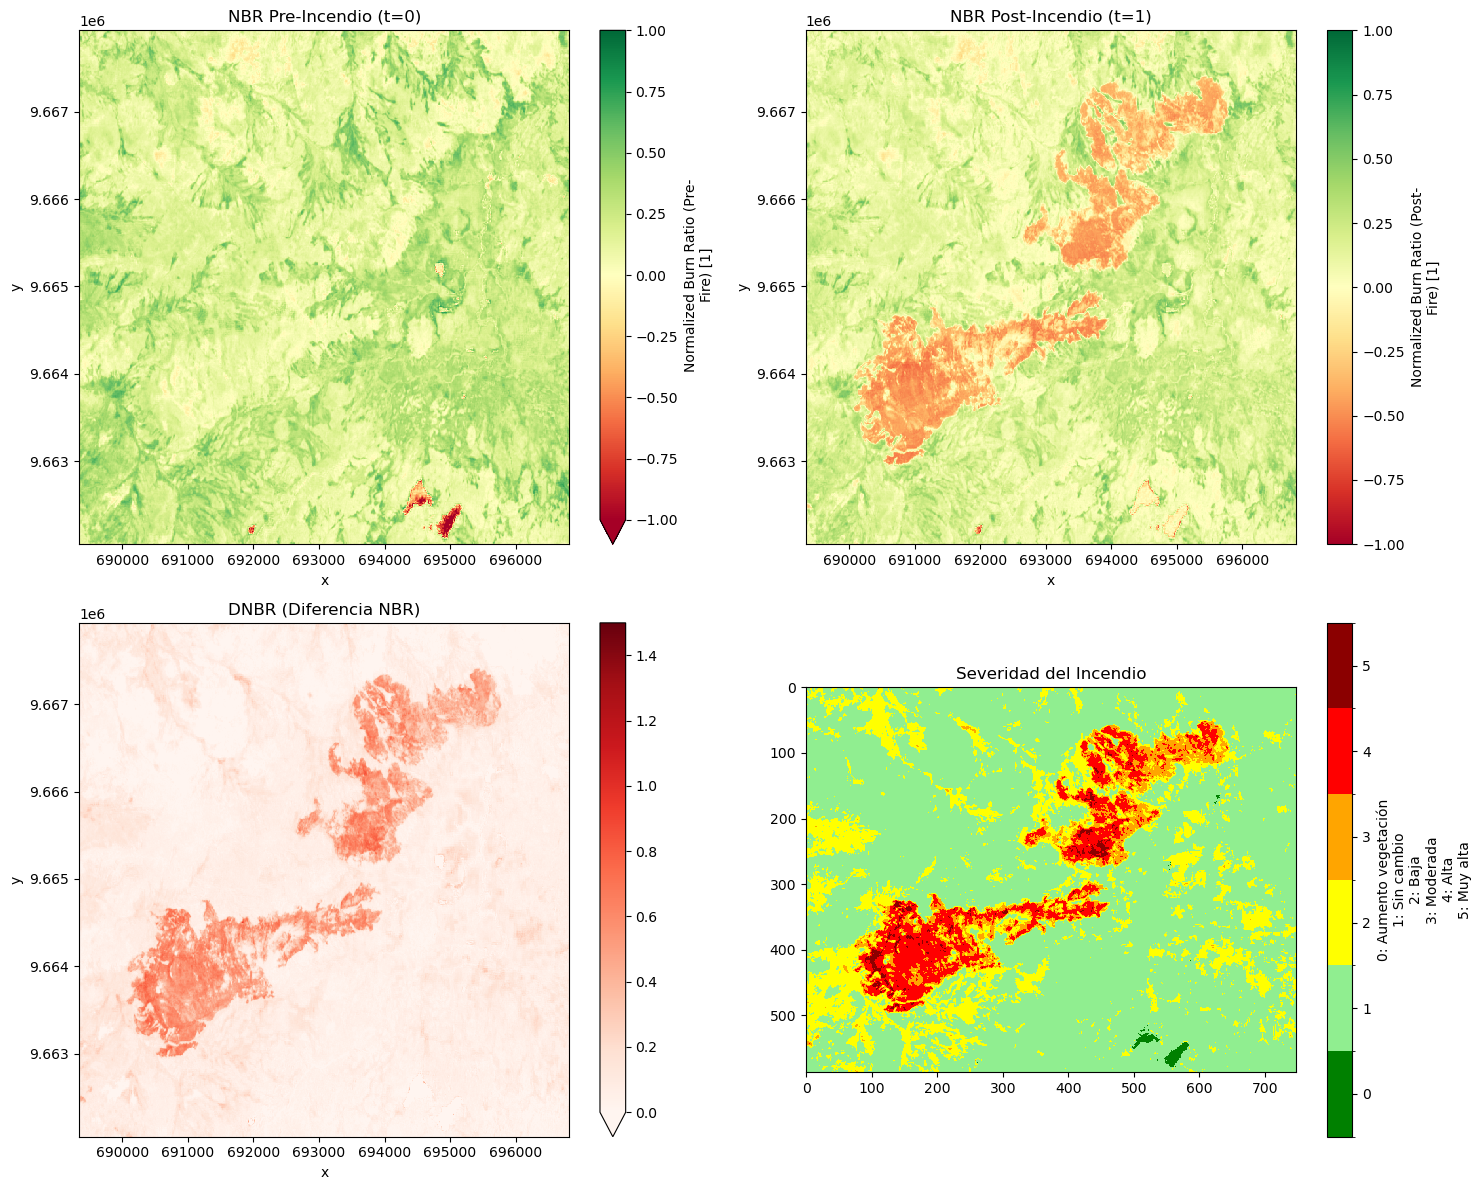


=== Estadísticas ===
NBR Pre-Incendio: Min=-2.71, Max=0.77
NBR Post-Incendio: Min=-0.82, Max=0.66
DNBR: Min=-2.60, Max=0.95


In [21]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# 1. Cargar el dataset
#dataset = xr.open_dataset('S2__pre_post_fire_ndvi.nc')

# 2. Verificación de datos
print("Tiempos disponibles:", dataset['t'].values)

# 3. Seleccionar tiempos válidos para pre y post incendio
# Asumiendo que tienes 2 tiempos: t=0 (pre) y t=1 (post)
time_pre = 0  # Índice para pre-incendio
time_post = 1  # Índice para post-incendio

# 4. Extraer datos para los tiempos específicos
nbr_pre = dataset['NBR_pre'].isel(t=time_pre)
nbr_post = dataset['NBR_post'].isel(t=time_post)

# 5. Calcular DNBR solo para píxeles con datos válidos en ambos tiempos
with np.errstate(invalid='ignore'):
    dnbr = nbr_pre - nbr_post
    dnbr = xr.where((~np.isnan(nbr_pre)) & (~np.isnan(nbr_post)), dnbr, np.nan)

# 6. Clasificación de severidad mejorada
severity_bins = [
    (-np.inf, -0.25, 0, "Aumento vegetación"),
    (-0.25, 0.1, 1, "Sin cambio"),
    (0.1, 0.27, 2, "Baja severidad"),
    (0.27, 0.44, 3, "Moderada"),
    (0.44, 0.66, 4, "Alta"),
    (0.66, np.inf, 5, "Muy alta")
]

severity = xr.full_like(dnbr, np.nan)
for min_val, max_val, class_val, label in severity_bins:
    severity = xr.where((dnbr >= min_val) & (dnbr < max_val), class_val, severity)

# 7. Visualización
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# NBR Pre-Incendio
nbr_pre.plot(ax=axes[0,0], cmap='RdYlGn', vmin=-1, vmax=1)
axes[0,0].set_title(f'NBR Pre-Incendio (t={time_pre})')

# NBR Post-Incendio
nbr_post.plot(ax=axes[0,1], cmap='RdYlGn', vmin=-1, vmax=1)
axes[0,1].set_title(f'NBR Post-Incendio (t={time_post})')

# DNBR
dnbr.plot(ax=axes[1,0], cmap='Reds', vmin=0, vmax=1.5)
axes[1,0].set_title('DNBR (Diferencia NBR)')

# Severidad
cmap = colors.ListedColormap(['green', 'lightgreen', 'yellow', 'orange', 'red', 'darkred'])
bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

img = axes[1,1].imshow(severity, cmap=cmap, norm=norm)
axes[1,1].set_title('Severidad del Incendio')
plt.colorbar(img, ax=axes[1,1], ticks=[0,1,2,3,4,5], 
             label='0: Aumento vegetación\n1: Sin cambio\n2: Baja\n3: Moderada\n4: Alta\n5: Muy alta')

plt.tight_layout()
plt.show()

# Estadísticas
print("\n=== Estadísticas ===")
print(f"NBR Pre-Incendio: Min={np.nanmin(nbr_pre.values):.2f}, Max={np.nanmax(nbr_pre.values):.2f}")
print(f"NBR Post-Incendio: Min={np.nanmin(nbr_post.values):.2f}, Max={np.nanmax(nbr_post.values):.2f}")
print(f"DNBR: Min={np.nanmin(dnbr.values):.2f}, Max={np.nanmax(dnbr.values):.2f}")



## ✅ Conclusión

En este notebook exploramos algunas de las funciones básicas disponibles a través de la API de **openEO**, utilizando las máquinas virtuales gratuitas del **Copernicus Data Space Ecosystem (CDSE)**. A lo largo del documento, aplicamos procesos como la carga y filtrado de colecciones satelitales, el cálculo de índices espectrales y la exportación de resultados en formatos como **netCDF**, todo dentro de un entorno reproducible y escalable en la nube.

Este ejercicio representa solo una introducción al potencial del ecosistema de Copernicus para el análisis geoespacial. Si tiene preguntas o desea profundizar en alguno de los temas tratados, no dude en ponerse en contacto.

📩 *Contacto: Cristian Aguilar-Barboza — cristian.aguilar.rac@gmail.com*
